#  Лабораторная работа №8.11
#  Ивакин Кирилл.  Вариант 2. 
#  --------------------------------------------------------
##                                             Условие

![task.png](task.png)

# Результаты

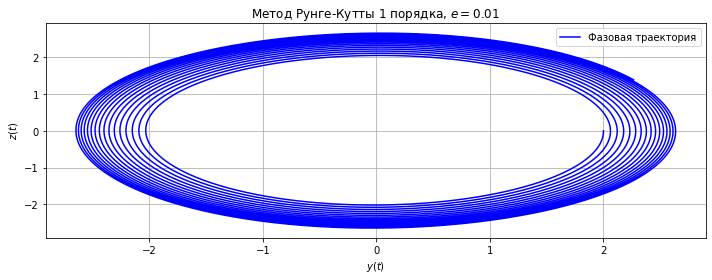

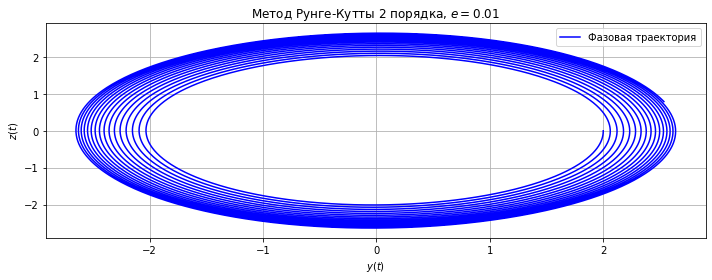

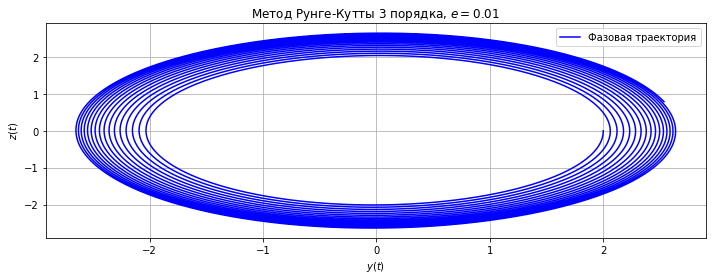

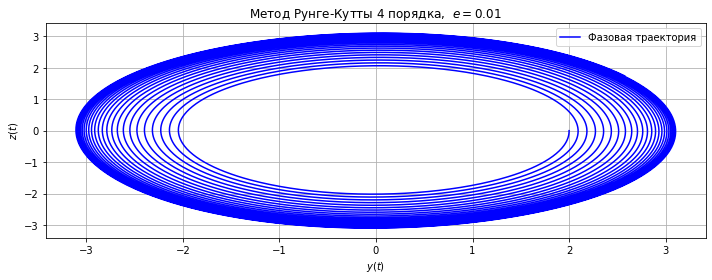

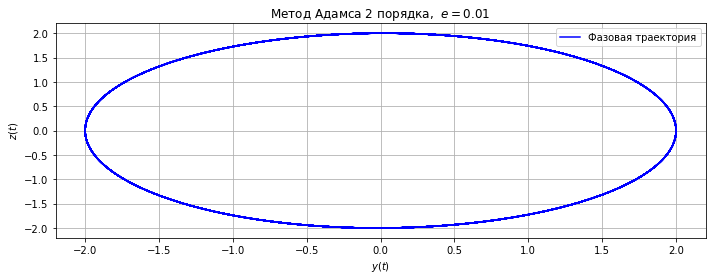

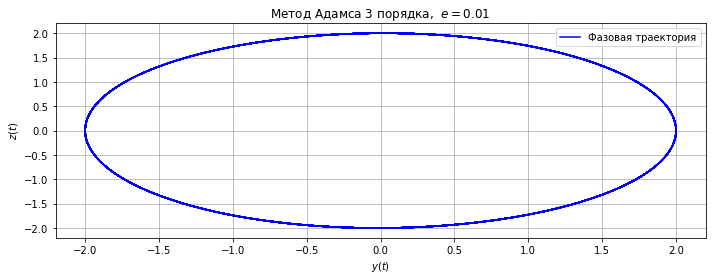

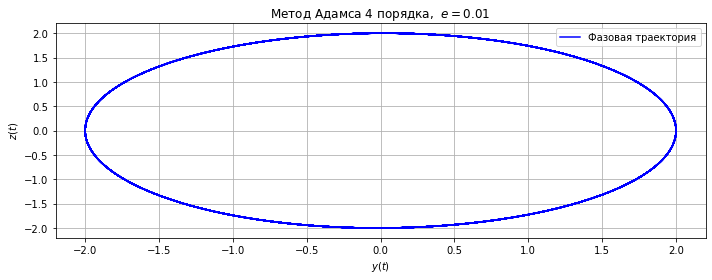

In [72]:
plotResults(0.01)

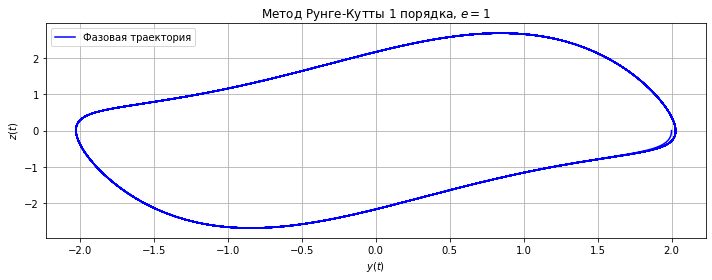

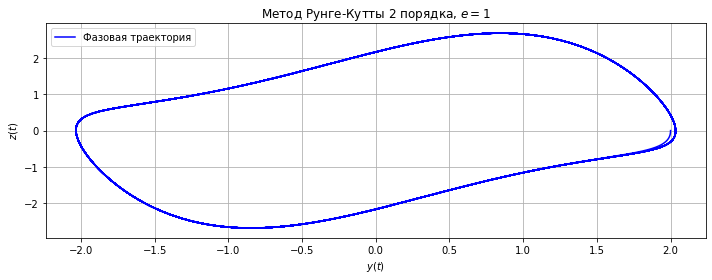

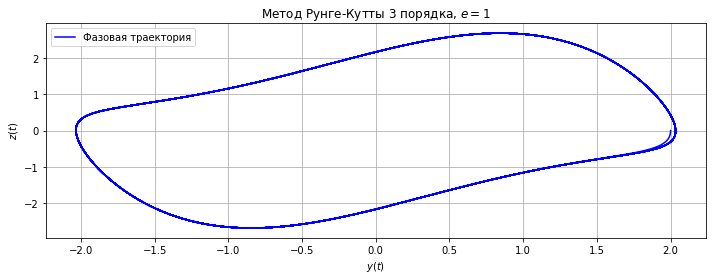

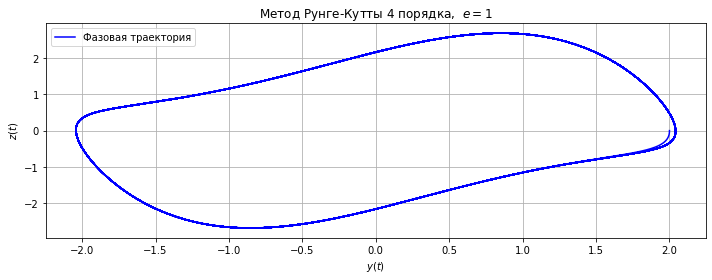

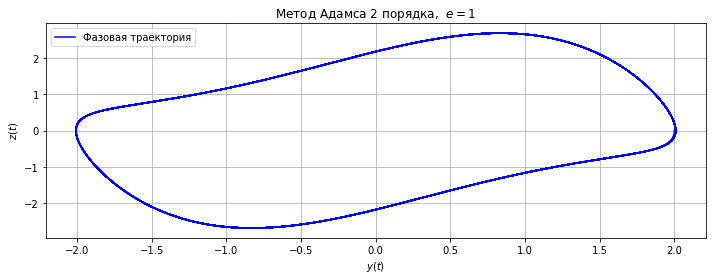

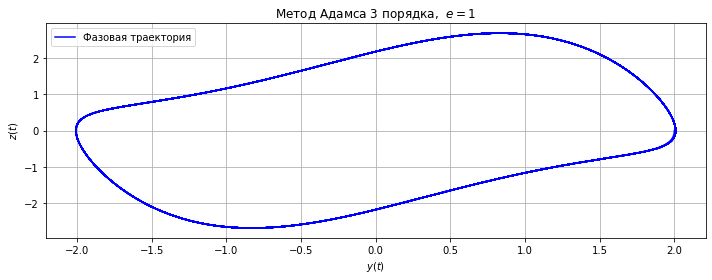

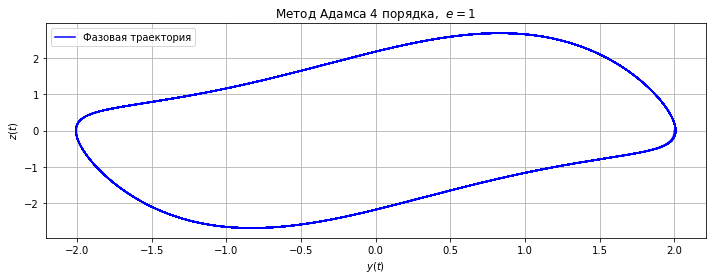

In [73]:
plotResults(1)

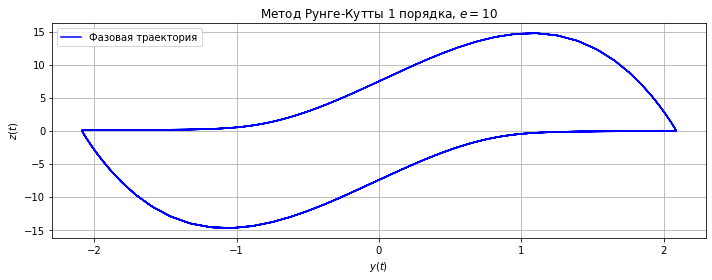

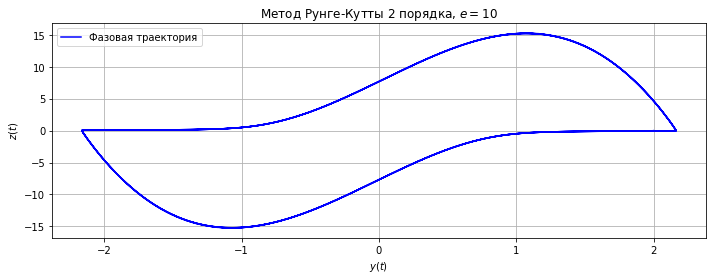

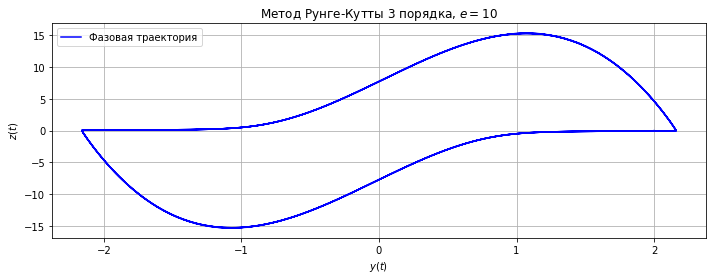

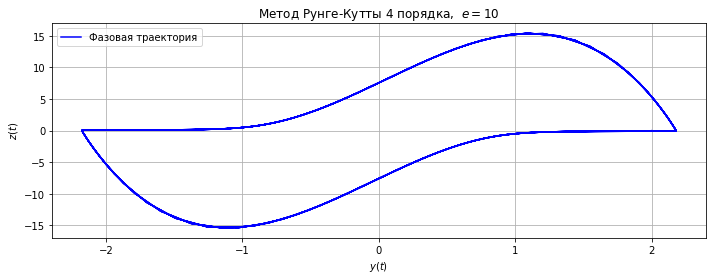

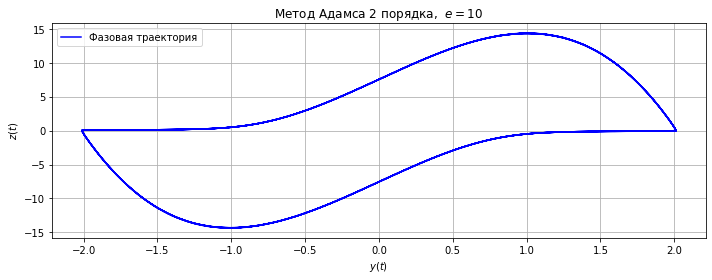

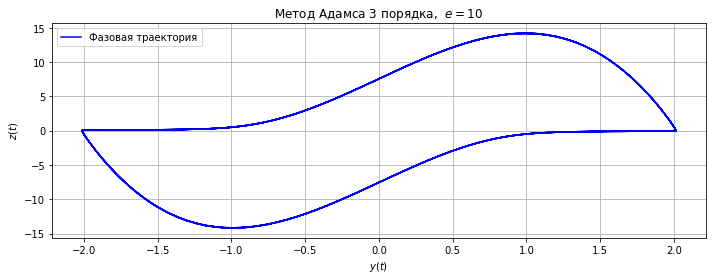

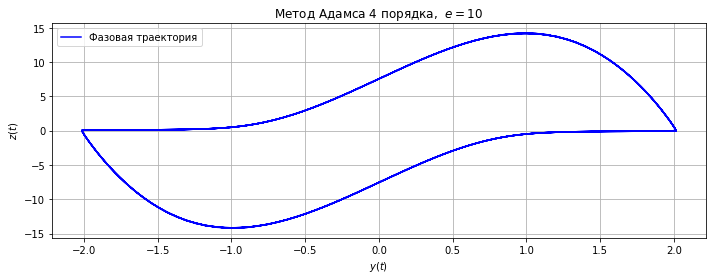

In [74]:
plotResults(10)

# Реализация

In [58]:
import numpy as np
import matplotlib.pyplot as plt

In [59]:
def VanDerPolSysem(z, y, e, TYPE = 1):
    return z, e * (1 - y**2) * z - y

In [60]:
def InitialСonditions():
    return 2, 0

In [61]:
def plot(y, z, description = ""):
    plt.figure(figsize=[10, 4])
    plt.title(description)
    plt.plot(y, z, 'b', label='Фазовая траектория')
    plt.grid()
    plt.xlabel("$y(t)$")
    plt.ylabel("$z(t)$")
    plt.legend()
    plt.tight_layout()
    plt.show()

In [62]:
def  RungeKutta(h, e, rhs, method):
    size = method[0].size
    elemsSize = int(rhs/h)

    y = np.zeros(elemsSize)
    z = np.zeros(elemsSize)
    
    y[0] = InitialСonditions()[0]
    z[0] = InitialСonditions()[1]
    
    for i in range(elemsSize - 1):
        ky = np.zeros(size - 1)
        kz = np.zeros(size - 1)
        
        for j in range(size - 1):
            a      = method[j, 1:]
            fstArg = y[i] + method[0, j]
            doty   = np.dot(ky, a)
            dotz   = np.dot(kz, a)
            
            scdArgy = z[i] + h * doty
            scdArgz = z[i] + h * dotz
            
            ky[j] = VanDerPolSysem(scdArgy, fstArg, e)[0]
            kz[j] = VanDerPolSysem(scdArgz, fstArg, e)[1]

        b      = method[size - 1][1:]
        doty   = np.dot(ky, b)
        dotz   = np.dot(kz, b)

        y[i+1] = y[i] + h * doty
        z[i+1] = z[i] + h * dotz
        
    return y, z

### Метод Рунге-Кутты 1 порядка

![rg1.jpg](rg1.jpg)

In [63]:
RG1 = np.array ([[  0,   0],
                 [  0,   1]])

###  Метод Рунге-Кутты 2 порядка

![rg2.jpg](rg2.jpg)

In [64]:
RG2 = np.array ([[  0,   0, 0],
                 [0.5, 0.5, 0],
                 [  0,   0, 1]])

###  Метод Рунге-Кутты 3 порядка

![rg3.jpg](rg3.jpg)

In [65]:
RG3 = np.array ([[      0,       0,       0,       0],
                 [1.0 / 3, 1.0 / 3,       0,       0],
                 [2.0 / 3,       0, 2.0 / 3,       0],
                 [      0, 1.0 / 4,       0, 3.0 / 4]])

###  Метод Рунге-Кутты 4 порядка

![rg4.jpg](rg4.jpg)

In [66]:
RG4 = np.array ([[      0,       0,       0,       0,       0],
                 [1.0 / 2, 1.0 / 2,       0,       0,       0],
                 [1.0 / 2,       0, 1.0 / 2,       0,       0],
                 [      1,       0,       0,       1,       0],
                 [      0, 4.0 / 6, 2.0 / 6, 2.0 / 6, 1.0 / 6]])

### Метод Адамса 2 - 4 порядок

![adams.jpg](adams.jpg)

In [67]:
def Adams2(h, e, rhs):
    elemsSize = int(rhs/h)
    y = np.zeros(elemsSize)
    z = np.zeros(elemsSize)
    
    y[0] = InitialСonditions()[0]
    z[0] = InitialСonditions()[1]
    y[1] = RungeKutta2(h, e, rhs)[0][1]
    z[1] = RungeKutta2(h, e, rhs)[1][1]
    
    for t in range(1, elemsSize - 1):
        y[t+1] = y[t] + h * (1.5 * VanDerPolSysem(z[t], y[t], e)[0] - 0.5 * VanDerPolSysem(z[t-1], y[t-1], e)[0])
        z[t+1] = z[t] + h * (1.5 * VanDerPolSysem(z[t], y[t], e)[1] - 0.5 * VanDerPolSysem(z[t-1], y[t-1], e)[1])
        
    return y, z

In [68]:
def Adams3(h, e, rhs):
    elemsSize = int(rhs/h)
    y = np.zeros(elemsSize)
    z = np.zeros(elemsSize)
    
    y[0] = InitialСonditions()[0]
    z[0] = InitialСonditions()[1]
    y[1] = RungeKutta3(h, e, rhs)[0][1]
    z[1] = RungeKutta3(h, e, rhs)[1][1]
    y[2] = RungeKutta3(h, e, rhs)[0][2]
    z[2] = RungeKutta3(h, e, rhs)[1][2]
    
    for t in range(2, elemsSize - 1):
        y[t+1] = y[t] + h * (23.0 / 12 * VanDerPolSysem(z[t], y[t], e)[0] - 16.0 / 12 * VanDerPolSysem(z[t-1], y[t-1], e)[0] + 5.0 / 12 * VanDerPolSysem(z[t-2], y[t-2], e)[0])
        z[t+1] = z[t] + h * (23.0 / 12 * VanDerPolSysem(z[t], y[t], e)[1] - 16.0 / 12 * VanDerPolSysem(z[t-1], y[t-1], e)[1] + 5.0 / 12 * VanDerPolSysem(z[t-2], y[t-2], e)[1])
        
    return y, z

In [69]:
def Adams4(h, e, rhs):
    elemsSize = int(rhs/h)
    y = np.zeros(elemsSize)
    z = np.zeros(elemsSize)
    
    y[0] = InitialСonditions()[0]
    z[0] = InitialСonditions()[1]
    y[1] = RungeKutta4(h, e, rhs)[0][1]
    z[1] = RungeKutta4(h, e, rhs)[1][1]
    y[2] = RungeKutta4(h, e, rhs)[0][2]
    z[2] = RungeKutta4(h, e, rhs)[1][2]
    y[3] = RungeKutta4(h, e, rhs)[0][3]
    z[3] = RungeKutta4(h, e, rhs)[1][3]
    
    for t in range(3, elemsSize - 1):
        y[t+1] = y[t] + h * (55.0 / 24 * VanDerPolSysem(z[t], y[t], e)[0] - 59.0 / 24 * VanDerPolSysem(z[t-1], y[t-1], e)[0] + 37.0 / 24.0 * VanDerPolSysem(z[t-2], y[t-2], e)[0] - 9.0 / 24 * VanDerPolSysem(z[t-3], y[t-3], e)[0])
        z[t+1] = z[t] + h * (55.0 / 24 * VanDerPolSysem(z[t], y[t], e)[1] - 59.0 / 24 * VanDerPolSysem(z[t-1], y[t-1], e)[1] + 37.0 / 24.0 * VanDerPolSysem(z[t-2], y[t-2], e)[1] - 9.0 / 24 * VanDerPolSysem(z[t-3], y[t-3], e)[1])
    return y, z

In [71]:
def plotResults(e):
    y, z = RungeKutta(0.01, e, 100, RG1)
    plot(y, z, "Метод Рунге-Кутты 1 порядка, $e = $" + str(e))
    
    y, z = RungeKutta(0.01, e, 100, RG2)
    plot(y, z, "Метод Рунге-Кутты 2 порядка, $e = $" + str(e))
    
    y, z = RungeKutta(0.01, e, 100, RG3)
    plot(y, z, "Метод Рунге-Кутты 3 порядка, $e = $" + str(e))
    
    y, z = RungeKutta(0.01, e, 100, RG4)
    plot(y, z, "Метод Рунге-Кутты 4 порядка,  $e = $" + str(e))
    
    y, z = Adams2(0.01, e, 100)
    plot(y, z, "Метод Адамса 2 порядка,  $e = $" + str(e))
    
    y, z = Adams3(0.01, e, 100)
    plot(y, z, "Метод Адамса 3 порядка,  $e = $" + str(e))
    
    y, z = Adams3(0.01, e, 100)
    plot(y, z, "Метод Адамса 4 порядка,  $e = $" + str(e))